## Import libraries and dependencies

In [65]:
import os
from pathlib import Path
import pandas as pd
import hvplot.pandas
import seaborn as sns
import numpy as np
import plotly.express as px
import panel as pn
from panel.interact import interact
pn.extension("plotly")


%matplotlib inline

## Read in stock data and add new header with column names

In [66]:
one_mo_returns = pd.read_csv(Path("../Resources/stocks_1month_returns.csv"), 
     names=["Null", "Ticker","Company Name", "Current Price", "Null2", "1 Month Price", "1 Mth Growth"])
six_mo_returns = pd.read_csv(Path("../Resources/stocks_6month_returns.csv"), 
     names=["Null", "Ticker","Company Name", "Current Price", "Null2", "6 Month Price", "6 Mth Growth"])
one_yr_returns = pd.read_csv(Path("../Resources/stocks_1yr_returns.csv"), 
     names=["Null", "Ticker","Company Name", "Current Price", "Null2", "1 Year Price", "1 Yr Growth"])
five_yr_returns = pd.read_csv(Path("../Resources/stocks_5yr_returns.csv"), 
     names=["Null", "Ticker","Company Name", "Current Price", "5 Year Price", "Null2", "5 Yr Growth"])
sp500_returns = pd.read_csv(Path("../Resources/index_sp500_returns.csv"))
sp500_sectors = pd.read_csv(Path("../Resources/sp500_sectors.csv"))

# View data head
five_yr_returns.head()


,Null,Ticker,Company Name,Current Price,5 Year Price,Null2,5 Yr Growth
0,NaN,CARR,Carrier Global Corp,29.15,NaN,NaN,NaN
1,NaN,CTVA,Corteva Inc,28.97,NaN,NaN,NaN
2,NaN,DOW,Dow Inc,50.09,NaN,NaN,NaN
3,NaN,DXC,DXC Technology Co,20.19,NaN,NaN,NaN
4,NaN,FTV,Fortive Corp,77.63,NaN,NaN,NaN


## Rename columns in sp500_returns to match other dataframes

In [67]:
sp500_returns = sp500_returns.rename(columns={"Ticker": "Ticker", "Name": "Company Name", "Current Price": "Current Price", "1month": "1 Month Price", "1mth growth": "1 Mth Growth", "6month": "6 Month Price","6mth growth": "6 Mth Growth", "1year": "1 Year Price", "1 yr growth": "1 Yr Growth", "5year": "5 Year Price", "5 yr growth": "5 Yr Growth"})
sp500_returns.head()

,Ticker,Company Name,Current Price,1 Month Price,1 Mth Growth,6 Month Price,6 Mth Growth,1 Year Price,1 Yr Growth,3year,3 yr growth,5 Year Price,5 Yr Growth
0,INX,S&P 500,3383.54,3372.85,0.32%,2386.13,41.80%,2997.96,12.86%,2125.77,59.17%,1953.03,73.25%


## Assign Sector value to sp500 data

In [68]:
sector = 'INDEX'
sp500_returns['Sector'] = sector
sp500_returns.head()

,Ticker,Company Name,Current Price,1 Month Price,1 Mth Growth,6 Month Price,6 Mth Growth,1 Year Price,1 Yr Growth,3year,3 yr growth,5 Year Price,5 Yr Growth,Sector
0,INX,S&P 500,3383.54,3372.85,0.32%,2386.13,41.80%,2997.96,12.86%,2125.77,59.17%,1953.03,73.25%,INDEX


## Rename columns in sp500_sectors to match other dataframes

In [69]:
col_names = ["Company Name", "Ticker", "Pct of Portfolio", "Sector", "Zacks G Sector"]
sp500_sectors.columns = col_names
sp500_sectors.head()

,Company Name,Ticker,Pct of Portfolio,Sector,Zacks G Sector
0,ACTIVISION BLZD,ATVI,0.2%,TECHNOLOGY,COMMUNICATION SVCS
1,ALPHABET INC-A,GOOGL,1.6%,TECHNOLOGY,COMMUNICATION SVCS
2,ALPHABET INC-C,GOOG,1.6%,TECHNOLOGY,COMMUNICATION SVCS
3,AT&T INC,T,0.7%,UTILITIES,COMMUNICATION SVCS
4,CENTURYLINK INC,CTL,0.0%,UTILITIES,COMMUNICATION SVCS


## Delete empty columns and unnecessary columns

In [70]:
one_month = one_mo_returns.drop(columns=["Null", "Null2"])
six_month = six_mo_returns.drop(columns=["Null", "Company Name", "Current Price", "Null2"])
one_year = one_yr_returns.drop(columns=["Null", "Company Name", "Current Price", "Null2"])
five_year = five_yr_returns.drop(columns=["Null", "Company Name", "Current Price", "Null2"])
sp500 = sp500_returns.drop(columns=["3year", "3 yr growth"])
sectors = sp500_sectors.drop(columns=["Company Name", "Pct of Portfolio", "Zacks G Sector"])
five_year.head()


,Ticker,5 Year Price,5 Yr Growth
0,CARR,NaN,NaN
1,CTVA,NaN,NaN
2,DOW,NaN,NaN
3,DXC,NaN,NaN
4,FTV,NaN,NaN


## Drop Nulls

In [71]:
one_month.dropna(inplace=True)
six_month.dropna(inplace=True)
one_year.dropna(inplace=True)
five_year.dropna(inplace=True)
sp500.dropna(inplace=True)
sectors.dropna(inplace=True)

six_month.head()

,Ticker,6 Month Price,6 Mth Growth
2,FCX,6.24,162.18%
3,FDX,90.49,161.18%
4,NVDA,196.40,162.16%
5,LB,11.65,149.36%
6,HAL,5.94,141.25%


## Set Ticker column as Index

In [72]:
one_month.set_index('Ticker', inplace=True)
six_month.set_index('Ticker', inplace=True)
one_year.set_index('Ticker', inplace=True)
five_year.set_index('Ticker', inplace=True)
sp500.set_index('Ticker', inplace=True)
sectors.set_index('Ticker', inplace=True)
six_month.head()

,6 Month Price,6 Mth Growth
Ticker,,
FCX,6.24,162.18%
FDX,90.49,161.18%
NVDA,196.40,162.16%
LB,11.65,149.36%
HAL,5.94,141.25%


## Combine Stocks dataframes and Sectors dataframe using columns as axis

In [73]:
combined_stocks = pd.concat([sectors, one_month, six_month, one_year, five_year], axis="columns", join="inner", sort=False)
combined_stocks.fillna(0, inplace=True)
combined_stocks.sort_values(by=['Current Price'], inplace=True, ascending=False)
combined_stocks.head()

,Sector,Company Name,Current Price,1 Month Price,1 Mth Growth,6 Month Price,6 Mth Growth,1 Year Price,1 Yr Growth,5 Year Price,5 Yr Growth
Ticker,,,,,,,,,,,
NVR,CONSUMER DISCRETION,"NVR, Inc.",4142.22,4044.81,2.41%,2321.78,78.41%,3576.34,15.82%,1574.99,163.00%
AMZN,CONSUMER DISCRETION,"Amazon.com, Inc.",3102.97,3148.02,-1.43%,1689.15,83.70%,1807.84,71.64%,522.37,494.02%
BKNG,CONSUMER DISCRETION,Booking Holdings Inc,1784.59,1778.87,0.32%,1289.67,38.38%,2072.95,-13.91%,1318.80,35.32%
GOOG,TECHNOLOGY,Alphabet Inc Class C,1519.28,1507.73,0.77%,1084.33,40.11%,1231.30,23.39%,635.14,139.20%
GOOGL,TECHNOLOGY,Alphabet Inc Class A,1508.83,1504.63,0.28%,1073.00,40.62%,1231.63,22.51%,665.07,126.87%


## Combine sp500 data with combined stocks and sectors dataframe using rows as axis

In [74]:
combo_stocks_sp500 = pd.concat([combined_stocks, sp500], axis="rows", join="inner", sort=False)
combo_stocks_sp500.sort_values(by=['Current Price'], inplace=True, ascending=False)
combo_stocks_sp500.head()

,Sector,Company Name,Current Price,1 Month Price,1 Mth Growth,6 Month Price,6 Mth Growth,1 Year Price,1 Yr Growth,5 Year Price,5 Yr Growth
Ticker,,,,,,,,,,,
NVR,CONSUMER DISCRETION,"NVR, Inc.",4142.22,4044.81,2.41%,2321.78,78.41%,3576.34,15.82%,1574.99,163.00%
INX,INDEX,S&P 500,3383.54,3372.85,0.32%,2386.13,41.80%,2997.96,12.86%,1953.03,73.25%
AMZN,CONSUMER DISCRETION,"Amazon.com, Inc.",3102.97,3148.02,-1.43%,1689.15,83.70%,1807.84,71.64%,522.37,494.02%
BKNG,CONSUMER DISCRETION,Booking Holdings Inc,1784.59,1778.87,0.32%,1289.67,38.38%,2072.95,-13.91%,1318.80,35.32%
GOOG,TECHNOLOGY,Alphabet Inc Class C,1519.28,1507.73,0.77%,1084.33,40.11%,1231.30,23.39%,635.14,139.20%


## Group stocks by Sector

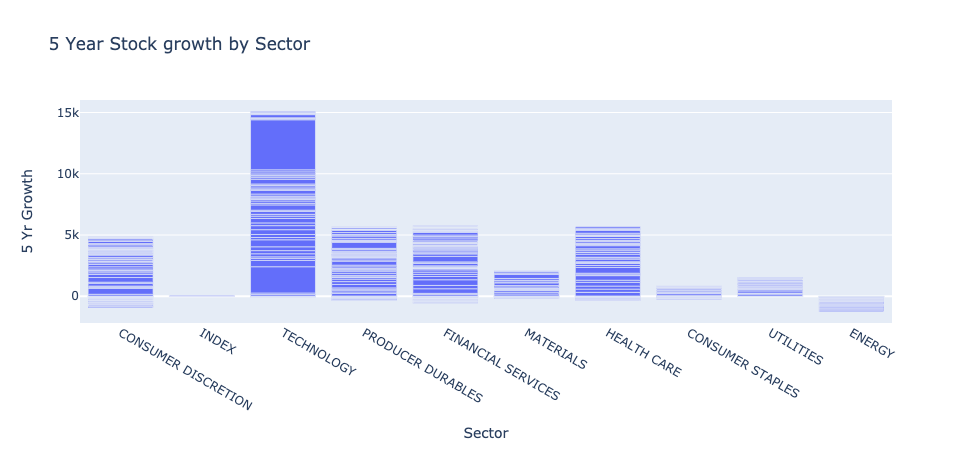

In [79]:
#stock_sectors = combo_stocks_sp500.groupby('Sector')['Current Price'].plot(kind='bar', legend=True)


stocks_by_sector = combo_stocks_sp500.groupby("Sector").mean().reset_index()
bar_plot5 = px.bar(
    combo_stocks_sp500, x="Sector", y="5 Yr Growth", title="5 Year Stock growth by Sector"
)
bar_plot5